In [176]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the processed data file
file_path = 'bitcoin_price_sentiment.csv'  # Ensure the file path is correct
df = pd.read_csv(file_path)

In [177]:
# Define the ARIMA model with custom parameters (p, d, q)
best_model = ARIMA(df['Close'], order=(3, 4, 5))

# Fit the model to the data
best_model_fit = best_model.fit()

# Print the summary of the fitted ARIMA model
print(best_model_fit.summary())

# Explanation of the ARIMA(p, d, q) parameters:
# p: Number of lag observations (past values) to include (Autoregressive part)
# d: Number of times to difference the data to make it stationary
# q: Number of lagged forecast errors in the prediction (Moving Average part)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  222
Model:                 ARIMA(3, 4, 5)   Log Likelihood               -2057.493
Date:                Wed, 09 Oct 2024   AIC                           4132.987
Time:                        14:55:08   BIC                           4163.447
Sample:                             0   HQIC                          4145.290
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7274      0.092     -7.936      0.000      -0.907      -0.548
ar.L2         -0.9442      0.064    -14.711      0.000      -1.070      -0.818
ar.L3          0.0525      0.088      0.598      0.5

In [178]:
# Use the best fitted model to forecast the next 10 days
forecast = best_model_fit.forecast(steps=10)

# Print the forecasted results
print(f'Forecast for the next 10 days:\n{forecast}')

Forecast for the next 10 days:
222    17434.005889
223    17848.087632
224    17672.394841
225    17751.981627
226    18379.383995
227    18499.140486
228    18650.687643
229    19457.075515
230    19903.863962
231    20172.534479
Name: predicted_mean, dtype: float64


In [179]:
import requests
import pandas as pd

def get_crypto_compare_data(start_date, end_date, api_key):
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': 'BTC',
        'tsym': 'USD',
        'limit': 2000,  # Set the maximum number of days to retrieve
        'toTs': end_date,
        'api_key': api_key  # Your API key
    }
    response = requests.get(url, params=params)
    data = response.json()

    if 'Data' in data and 'Data' in data['Data']:
        return pd.DataFrame(data['Data']['Data'])
    else:
        print("Error fetching data:", data)
        return None

# Assuming you have obtained the API key and set the start and end dates
api_key = 'your_api_key'
start_date = int(pd.Timestamp('2023-10-01').timestamp())
end_date = int(pd.Timestamp('2023-10-10').timestamp())

# Fetch historical price data
btc_data = get_crypto_compare_data(start_date, end_date, api_key)

# Display the data
print(btc_data)

            time      high       low      open  volumefrom      volumeto  \
0     1524096000   8321.01   8136.42   8189.92    72820.98  6.020990e+08   
1     1524182400   8945.14   8243.49   8301.82   114730.74  9.799949e+08   
2     1524268800   9047.82   8631.18   8877.15    93635.24  8.290734e+08   
3     1524355200   9043.98   8788.44   8935.85    68212.83  6.101831e+08   
4     1524441600   9025.73   8804.20   8823.46    61895.95  5.538923e+08   
...          ...       ...       ...       ...         ...           ...   
1996  1696550400  28280.04  27181.63  27414.59    25278.57  7.016485e+08   
1997  1696636800  28035.05  27864.11  27946.61     7351.08  2.053946e+08   
1998  1696723200  28105.36  27714.35  27973.69     8547.03  2.386900e+08   
1999  1696809600  27999.80  27282.89  27933.57    21887.87  6.039641e+08   
2000  1696896000  27735.72  27298.50  27598.77    18600.95  5.111095e+08   

         close conversionType conversionSymbol  
0      8301.82         direct         

In [180]:
# Convert the timestamp to a datetime format
btc_data['date'] = pd.to_datetime(btc_data['time'], unit='s')

# Generate the date range for the forecasted dates
forecast_dates = pd.date_range(df['date'].iloc[-1], periods=10, freq='D')

# Get the actual Bitcoin prices from historical data that match the forecasted dates
btc_actual = btc_data[btc_data['date'].isin(forecast_dates)]

# Combine ARIMA model predictions and actual prices into a DataFrame
comparison_df = pd.DataFrame({
    'Date': forecast_dates,
    'Predicted Price': forecast.values,
    'Actual Price': btc_actual['close'].values
})

# Display the comparison DataFrame
print(comparison_df)

        Date  Predicted Price  Actual Price
0 2023-01-09     17434.005889      17179.03
1 2023-01-10     17848.087632      17442.44
2 2023-01-11     17672.394841      17938.00
3 2023-01-12     17751.981627      18849.00
4 2023-01-13     18379.383995      19932.05
5 2023-01-14     18499.140486      20954.52
6 2023-01-15     18650.687643      20878.94
7 2023-01-16     19457.075515      21188.92
8 2023-01-17     19903.863962      21136.12
9 2023-01-18     20172.534479      20678.47


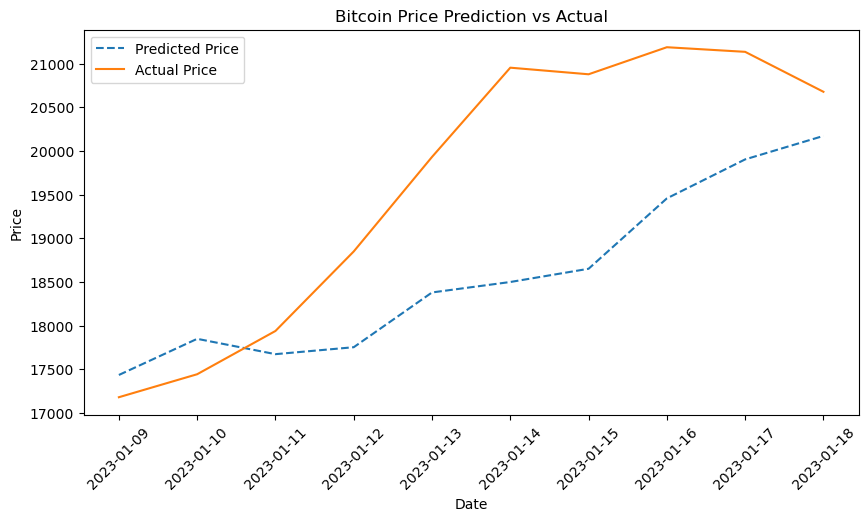

In [181]:
# Plot the comparison between predicted and actual Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['Date'], comparison_df['Predicted Price'], label='Predicted Price', linestyle='--')
plt.plot(comparison_df['Date'], comparison_df['Actual Price'], label='Actual Price', linestyle='-')
plt.xlabel('Date')  # Label for the x-axis (Dates)
plt.ylabel('Price')  # Label for the y-axis (Prices)
plt.title('Bitcoin Price Prediction vs Actual')  # Title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend to differentiate predicted and actual prices
plt.show()  # Display the plot